In [16]:
import qiskit.tools.jupyter
%qiskit_version_table

# Hands on 3

Today's session starts with a cheatsheet on single qubit gates, and we will delve deeper into measurement

## Single Qubit Gates
In the previous section we looked at all the possible states a qubit could be in. We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where $\theta$ and $\phi$ are real numbers. In this section we will cover _gates,_ the operations that change a qubit between these states. Due to the number of gates and the similarities between them, this chapter is at risk of becoming a list. To counter this, we have included a few digressions to introduce important ideas at appropriate places throughout the chapter. 

### Contents

1. [The Pauli Gates](#pauli)    
    1.1 [The X-Gate](#xgate)    
    1.2 [The Y & Z-Gates](#ynzgatez)    
2. [Digression: The X, Y & Z-Bases](#xyzbases)    
3. [The Hadamard Gate](#hgate)    
4. [Digression: Measuring in Different Bases](#measuring)    
5. [The P-gate](#rzgate)    
6. [The I, S and T-gates](#istgates)    
    6.1 [The I-Gate](#igate)    
    6.2 [The S-Gate](#sgate)    
    6.3 [The T_Gate](#tgate)    
7. [The General U-gate](#generalU)    

In _The Atoms of Computation_ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations (gates) are *_always_* reversible! These reversible gates can be represented as matrices, and as rotations around the Bloch sphere. 

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

### 1. The Pauli Gates <a id="pauli"></a>
You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

#### 1.1 The X-Gate <a id="xgate"></a>
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


In Qiskit, we can create a short circuit to verify this:

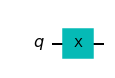

In [3]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

Let's see the result of the above circuit. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

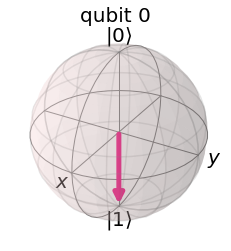

In [4]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

#### 1.2 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.


In Qiskit, we can apply the Y and Z-gates to our circuit using:

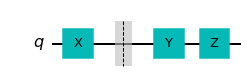

In [5]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw('mpl')

### 2. Digression: The X, Y & Z-Bases <a id="xyzbases"></a>

#### Reminder: Eigenvectors of Matrices
We have seen that multiplying a vector by a matrix results in a vector:
     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{new vector}
    $$
If we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by a scalar:
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$
(Above, $M$ is a matrix, and $\lambda$ is a scalar). For a matrix $M$, any vector that has this property is called an <i>eigenvector</i> of $M$. For example, the eigenvectors of the Z-matrix are the states $|0\rangle$ and $|1\rangle$:

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$
Since we use vectors to describe the state of our qubits, we often call these vectors <i>eigenstates</i> in this context. Eigenvectors are very important in quantum computing, and it is important you have a solid grasp of them.


You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Another less commonly used basis is that formed by the eigenstates of the Y-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

We leave it as an exercise to calculate these. There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors. The eigenvectors of both Hermitian and unitary matrices form a basis for the vector space. Due to this property, we can be sure that the eigenstates of the X-gate and the Y-gate indeed form a basis for 1-qubit states (read more about this in the [linear algebra page](https://qiskit.org/textbook/ch-appendix/linear_algebra.html#Matrices-and-Matrix-Operations) in the appendix)

#### Send it after class 1
1. Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate.
2. What eigenvalues do they have? 
3. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

Using only the Pauli-gates it is impossible to move our initialized qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates!

### 3. The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.



#### Send it after class 2
1. Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.
2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).

### 4. Digression: Measuring in Different Bases  <a id="measuring"></a>
We have seen that the Z-axis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, the superposition is destroyed. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

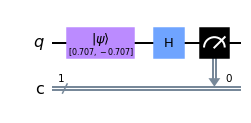

In [6]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw('mpl')

In the quick exercises above, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate performs a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis. We can verify this always behaves like an X-gate by multiplying the matrices:

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0\rangle$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

There is another way to see why the Hadamard gate indeed takes us from the Z-basis to the X-basis. Suppose the qubit we want to measure in the X-basis is in the (normalized) state $a |0\rangle + b |1\rangle$. To measure it in X-basis, we first express the state as a linear combination of $|+\rangle$ and $|-\rangle$. Using the relations $|0\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$ and $|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$, the state becomes $\frac{a + b}{\sqrt{2}}|+\rangle + \frac{a - b}{\sqrt{2}}|-\rangle$. Observe that the probability amplitudes in X-basis can be obtained by applying a Hadamard matrix on the state vector expressed in Z-basis.

Let’s now see the results:

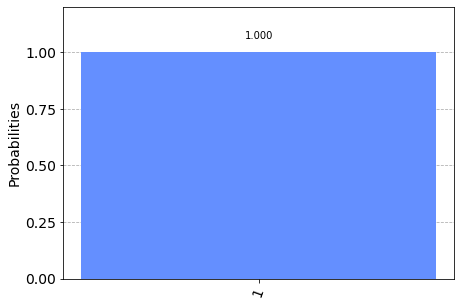

In [7]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

We initialized our qubit in the state $|-\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the state $|1\rangle$. If you run the cell again, you will see the same result, since along the X-basis, the state $|-\rangle$ is a basis state and measuring it along X will always yield the same result.


#### Send it after class 3
1.	If we initialize our qubit in the state $|+\rangle$, what is the probability of measuring it in state $|-\rangle$?
2.	Use Qiskit to display the probability of measuring a $|0\rangle$ qubit in the states $|+\rangle$ and $|-\rangle$ (**Hint:** you might want to use `.get_counts()` and `plot_histogram()`).
3.	Try to create a function that measures in the Y-basis.

Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the  X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit. 

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

More generally: _Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome._ 

The introduction of the H-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations. Let us now introduce a new type of gate:

### 5. The P-gate  <a id="rzgate"></a>

The P-gate (phase gate) is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The P-gate performs a rotation of $\phi$ around the Z-axis direction. It has the matrix form:

$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Where $\phi$ is a real number.



In Qiskit, we specify a P-gate using `p(phi, qubit)`:

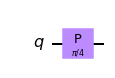

In [8]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw('mpl')

You may notice that the Z-gate is a special case of the P-gate, with $\phi = \pi$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the P-gate:

### 6. The I, S and T-gates  <a id="istgates"></a>

#### 6.1 The I-gate  <a id="igate"></a>

First comes the I-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

#### Send it after class 4
1. What are the eigenstates of the I-gate?

#### 6.2 The S-gates  <a id="sgate"></a>

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The S<sup>†</sup>-gate is clearly an P-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

To add an S-gate in Qiskit:

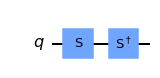

In [9]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw('mpl')

#### 6.3 The T-gate <a id="tgate"></a>
The T-gate is a very commonly used gate, it is an P-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In Qiskit:

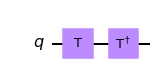

In [10]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw('mpl')

### 7. The U-gate  <a id="generalU"></a>

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general P-gate. In the same way, the U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U(\theta,\phi,\lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

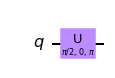

In [11]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw('mpl')

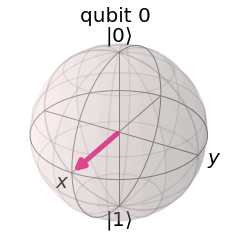

In [12]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. Qiskit also provides the X equivalent of the S and Sdg-gate i.e. the SX-gate and SXdg-gate respectively. These gates do a quarter-turn with respect to the X-axis around the Block sphere and are a special case of the R<sub>x</sub>-gate.


Before running on real IBM quantum hardware, all single-qubit operations are compiled down to $I$ , $X$, $SX$ and $R_{z}$ . For this reason they are sometimes called the _physical gates_.


## Quantum Measurements

### Part 1: Measuring the state of a qubit

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Determine the Bloch components of a qubit.</p>
</div>

Fundamental to the operation of a quantum computer is the ability to compute the Bloch components of a qubit or qubits. These components correspond to the expectation values of the Pauli operators $X, Y, Z$, and are important quantities for applications such as quantum chemistry and optimization.  Unfortunately, it is impossible to simultaneously compute these values, thus requiring many executions of the same circuit.  In addition, measurements are restricted to the computational basis (Z-basis) so that each Pauli needs to be rotated to the standard basis to access the x and y components.  Here we verify the methods by considering the case of a random vector on the Bloch sphere.

In [13]:
from qiskit import *
import numpy as np
from numpy import linalg as la
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter

#### 1. Express the expectation values of the Pauli operators for an arbitrary qubit state $|q\rangle$ in the computational basis.

The case for the expectation value of Pauli Z gate is given as an example. 

Using the diagonal representation, also known as spectral form or orthonormal decomposition, of Pauli $Z$ gate and the relations among the Pauli gates (see [here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)), expectation values of $ X, Y, Z $ gates can be written as  

$$
\begin{align}
\langle Z \rangle &=\langle q | Z | q\rangle =\langle q|0\rangle\langle 0|q\rangle - \langle q|1\rangle\langle 1|q\rangle
=|\langle 0 |q\rangle|^2 - |\langle 1 | q\rangle|^2\\\\
\langle X \rangle &= \\\\
\langle Y \rangle &=
\end{align}
\\
$$
, respectively.

Therefore, the expectation values of the Paulis for a qubit state $|q\rangle$ can be obtained by making a measurement in the standard basis after rotating the standard basis frame to lie along the corresponding axis. The probabilities of obtaining the two possible outcomes 0 and 1 are used to evaluate the desired expectation value as the above equations show.

#### 2. Measure the Bloch sphere coordinates of a qubit using the Aer simulator and plot the vector on the Bloch sphere.

##### Step A. Create a qubit state using the circuit method, <code>initialize</code> with two random complex numbers as the parameter.

To learn how to use the function `initialize`, check [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Arbitrary-initialization). (go to the `arbitrary initialization` section.)

In [14]:
qc = QuantumCircuit(1, 1)

#### your code goes here




##### Step B. Build the circuits to measure the expectation values of $X, Y, Z$ gate based on your answers to the question 1.  Run the cell below to estimate the Bloch sphere coordinates of the qubit from step A using the Aer simulator.

The circuit for $Z$ gate measurement is given as an example.

In [15]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
# your code goes here







# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
# your code goes here







shots = 2**14 # number of samples used for statistics
sim = Aer.get_backend('aer_simulator')
bloch_vector_measure = []
for measure_circuit in [measure_x, measure_y, measure_z]:
    
    # run the circuit with the selected measurement and get the number of samples that output each bit value
    circ_trans = transpile(qc.compose(measure_circuit), sim)
    counts = sim.run(qc.compose(circ_trans), shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {}
    for output in ['0','1']:
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector_measure.append( probs['0'] -  probs['1'] )

# normalizing the Bloch sphere vector
bloch_vector = bloch_vector_measure/la.norm(bloch_vector_measure)

print('The Bloch sphere coordinates are [{0:4.3f}, {1:4.3f}, {2:4.3f}]'
      .format(*bloch_vector))    

QiskitError: 'No counts for experiment "0"'

##### Step C. Plot the vector on the Bloch sphere.

Note that the following cell for the interactive bloch_sphere would not run properly unless you work in [IQX](https://quantum-computing.ibm.com/login). You can either use `plot_bloch_vector` for the non-interactive version or install `kaleidoscope` by running 

```
pip install kaleidoscope

```
in a terminal.  You also need to restart your kernel after the installation.  To learn more about how to use the interactive Bloch sphere, go [here](https://nonhermitian.org/kaleido/stubs/kaleidoscope.interactive.bloch_sphere.html#kaleidoscope.interactive.bloch_sphere).

In [ ]:
from kaleidoscope.interactive import bloch_sphere

bloch_sphere(bloch_vector, vectors_annotation=True)

In [ ]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector( bloch_vector )

### Part 2: Measuring Energy

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Evaluate the energy levels of the hydrogen ground state using Aer simulator.</p>
</div>


The energy of a quantum system can be estimated by measuring the expectation value of its Hamiltonian, which is a Hermitian operator, through the procedure we mastered in part 1.

The ground state of hydrogen is not defined as a single unique state but actually contains four different states due to the spins of the electron and proton. In part 2 of this lab, we evaluate the energy difference among these four states, which is from the `hyperfine splitting`, by computing the energy expectation value for the system of two spins with the Hamiltonian expressed in Pauli operators. For more information about `hyperfine structure`, see [here](https://www.feynmanlectures.caltech.edu/III_12.html)

Consider the system with two qubit interaction Hamiltonian $H = A(XX+YY+ZZ)$ where $A = 1.47e^{-6} eV$ and $X, Y, Z$ are Pauli gates. Then the energy expectation value of the system can be evaluated by combining the expectation value of each term in the Hamiltonian.
In this case, $E = \langle H\rangle = A( \langle XX\rangle + \langle YY\rangle + \langle ZZ\rangle )$. 

#### 1. Express the expectation value of each term in the Hamiltonian for an arbitrary two qubit state   $|\psi \rangle$ in the computational basis.

The case for the term $\langle ZZ\rangle$ is given as an example.

$$
\begin{align}
\langle ZZ\rangle &=\langle \psi | ZZ | \psi\rangle =\langle \psi|(|0\rangle\langle 0| - |1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle
=|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2\\\\
\langle XX\rangle &= \\\\
\langle YY\rangle &=
\end{align}
$$

#### 2. Measure the expected energy of the system using the Aer simulator when two qubits are entangled. Regard the bell basis, four different entangled states.

##### Step A. Construct the circuits to prepare four different bell states.

Let's label each bell state as
$$
\begin{align}
Tri1 &= \frac{1}{\sqrt2} (|00\rangle + |11\rangle)\\
Tri2 &= \frac{1}{\sqrt2} (|00\rangle - |11\rangle)\\
Tri3 &= \frac{1}{\sqrt2} (|01\rangle + |10\rangle)\\
Sing &= \frac{1}{\sqrt2} (|10\rangle - |01\rangle)
\end{align}
$$

In [ ]:
# circuit for the state Tri1
Tri1 = QuantumCircuit(2, 2)
# your code goes here






# circuit for the state Tri2
Tri2 = QuantumCircuit(2, 2)
# your code goes here





# circuit for the state Tri3
Tri3 = QuantumCircuit(2, 2)
# your code goes here






# circuit for the state Sing
Sing = QuantumCircuit(2, 2)
# your code goes here







##### Step B. Create the circuits to measure the expectation value of each term in the Hamiltonian based on your answer to the question 1.

In [ ]:
# <ZZ> 
measure_ZZ = QuantumCircuit(2)
measure_ZZ.measure_all()

# <XX>
measure_XX = QuantumCircuit(2)
# your code goes here





# <YY>
measure_YY = QuantumCircuit(2)
# your code goes here






 ##### Step C. Execute the circuits on Aer simulator by running the cell below and evaluate the energy expectation value for each state.

In [ ]:
shots = 2**14 # number of samples used for statistics

A = 1.47e-6 #unit of A is eV
E_sim = []
for state_init in [Tri1,Tri2,Tri3,Sing]:
    Energy_meas = []
    for measure_circuit in [measure_XX, measure_YY, measure_ZZ]:
    
        # run the circuit with the selected measurement and get the number of samples that output each bit value
        qc = state_init.compose(measure_circuit)
        qc_trans = transpile(qc, sim)
        counts = sim.run(qc_trans, shots=shots).result().get_counts()

        # calculate the probabilities for each computational basis
        probs = {}
        for output in ['00','01', '10', '11']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0
            
        Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )
 
    E_sim.append(A * np.sum(np.array(Energy_meas)))

In [ ]:
# Run this cell to print out your results

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E_sim[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E_sim[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E_sim[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E_sim[3]))

 ##### Step D. Understanding the result.

If you found the energy expectation values successfully, you would have obtained exactly the same value, $A (= 1.47e^{-6} eV)$, for the triplet states, $|Tri1\rangle, |Tri2\rangle, |Tri3\rangle$ and one lower energy level, $-3A (= -4.41e^{-6} eV)$ for the singlet state $|Sing\rangle$.   

What we have done here is measuring the energies of the four different spin states corresponding to the ground state of hydrogen and observed `hyperfine structure` in the energy levels caused by spin-spin coupling.  This tiny energy difference between the singlet and triplet states is the reason for the famous 21-cm wavelength radiation used to map the structure of the galaxy.  

In the cell below, we verify the wavelength of the emission from the transition between the triplet states and singlet state. 

In [ ]:
# reduced plank constant in (eV) and the speed of light(cgs units)
hbar, c = 4.1357e-15, 3e10

# energy difference between the triplets and singlet
E_del = abs(E_sim[0] - E_sim[3])

# frequency associated with the energy difference
f = E_del/hbar

# convert frequency to wavelength in (cm) 
wavelength = c/f

print('The wavelength of the radiation from the transition\
 in the hyperfine structure is : {:.1f} cm'.format(wavelength))

### Part 3: Execute the circuits on Quantum Computer

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;"> Re-run the circuits on a IBM quantum system.  Perform measurement error mitigations on the result to improve the accuracy in the energy estimation.</p>
</div>

##### Step A. Run the following cells to load your account and select the backend

In [ ]:
provider = IBMQ.load_account()

In [ ]:
backend = provider.get_backend('ibm_lima')

##### Step B. Execute the circuits on the quantum system.


In Lab1 when we executed multiple circuits on a real quantum system, we submitted each circuit as a separate job which produces the multiple job ids. This time, we put all the circuits in a list and execute the list of the circuits as one job. In this way, all the circuit executions can happen at once, which would possibly decrease your wait time in the queue.

<p>&#128211; Check the backend configuration information and error map through the widget to determine your <code>initial_layout</code>.

In [ ]:
# run this cell to get the backend information through the widget
backend

In [ ]:
# assign your choice for the initial layout to the list variable `initial_layout`.
initial_layout = 

Run the following cell to execute the circuits with the initial_layout on the backend.

In [ ]:
qc_all = [state_init.compose(measure_circuit) for state_init in [Tri1,Tri2,Tri3,Sing] 
          for measure_circuit in [measure_XX, measure_YY, measure_ZZ] ]  

shots = 8192
qc_all_trans = transpile(qc_all, backend, initial_layout=initial_layout, optimization_level=3)
job = backend.run(qc_all_trans, shots=shots)
print(job.job_id())

In [ ]:
# getting the results of your job
results = job.result()

In [ ]:
## To access the results of the completed job
#results = backend.retrieve_job('job_id').result()

##### Step C. Estimate the ground state energy levels from the results of the previous step by executing the cells below.

In [ ]:
def Energy(results, shots):
    """Compute the energy levels of the hydrogen ground state.
    
    Parameters:
        results (obj): results, results from executing the circuits for measuring a Hamiltonian.
        shots (int): shots, number of shots used for the circuit execution.
        
    Returns:
        Energy (list): energy values of the four different hydrogen ground states
    """
    E = []
    A = 1.47e-6

    for ind_state in range(4):
        Energy_meas = []
        for ind_comp in range(3):
            counts = results.get_counts(ind_state*3+ind_comp)
        
            # calculate the probabilities for each computational basis
            probs = {}
            for output in ['00','01', '10', '11']:
                if output in counts:
                    probs[output] = counts[output]/shots
                else:
                    probs[output] = 0
            
            Energy_meas.append( probs['00'] - probs['01'] - probs['10'] + probs['11'] )

        E.append(A * np.sum(np.array(Energy_meas)))
    
    return E

In [ ]:
E = Energy(results, shots)

print('Energy expectation value of the state Tri1 : {:.3e} eV'.format(E[0]))
print('Energy expectation value of the state Tri2 : {:.3e} eV'.format(E[1]))
print('Energy expectation value of the state Tri3 : {:.3e} eV'.format(E[2]))
print('Energy expectation value of the state Sing : {:.3e} eV'.format(E[3]))

##### Step D. Measurement error mitigation.

The results you obtained from running the circuits on the quantum system are not exact due to the noise from the various sources such as enery relaxation, dephasing, crosstalk between qubits, etc. In this step, we will alleviate the effects of the noise through the measurement error mitigation. Before we start, watch this [video](https://www.youtube.com/watch?v=yuDxHJOKsVA&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=8). 

In [ ]:
from qiskit.ignis.mitigation.measurement import *

<p>&#128211;Construct the circuits to profile the measurement errors of all basis states using the function 'complete_meas_cal'.  Obtain the measurement filter object, 'meas_filter', which will be applied to the noisy results to mitigate readout (measurement) error.<p> 

For further helpful information to complete this task, check [here](https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html) . 

In [ ]:
# your code to create the circuits, meas_calibs, goes here
meas_calibs, state_labels = 



# execute meas_calibs on your choice of the backend
meas_calibs_trans = transpile(meas_calibs, backend, optimization_level=3)
job = backend.run(meas_calibs_trans, backend, shots = shots)
print(job.job_id())
job_monitor(job)
cal_results = job.result()

## To access the results of the completed job
#cal_results = backend.retrieve_job('job_id').result()


# your code to obtain the measurement filter object, 'meas_filter', goes here







In [ ]:
results_new = meas_filter.apply(results)

In [ ]:
E_new = Energy(results_new, shots)

print('Energy expection value of the state Tri1 : {:.3e} eV'.format(E_new[0]))
print('Energy expection value of the state Tri2 : {:.3e} eV'.format(E_new[1]))
print('Energy expection value of the state Tri3 : {:.3e} eV'.format(E_new[2]))
print('Energy expection value of the state Sing : {:.3e} eV'.format(E_new[3]))

##### Step E. Interpret the result.

<p>&#128211; Compute the relative errors ( or the fractional error ) of the energy values for all four states with and without measurement error mitigation.<p>

In [ ]:
# results for the energy estimation from the simulation, 
# execution on a quantum system without error mitigation and
# with error mitigation in numpy array format 
Energy_exact, Energy_exp_orig, Energy_exp_new = np.array(E_sim), np.array(E), np.array(E_new)

In [ ]:
# Calculate the relative errors of the energy values without error mitigation 
# and assign to the numpy array variable `Err_rel_orig` of size 4
Err_rel_orig = 

In [ ]:
# Calculate the relative errors of the energy values with error mitigation 
# and assign to the numpy array variable `Err_rel_new` of size 4
Err_rel_new = 

In [ ]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 without measurement error mitigation : {}'.format(Err_rel_orig))

In [ ]:
np.set_printoptions(precision=3)

print('The relative errors of the energy values for four bell basis\
 with measurement error mitigation : {}'.format(Err_rel_new))

<p>&#128211; Compare the size of the errors before and after the measurment error mitigation and discuss about the effect of the readout error regarding the error map information of the backend that you selected.<p>  

**Your answer:**